In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\raths\\Downloads\\linkedin-reviews - linkedin-reviews.csv')

In [3]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# EDA (Exploratory Data Analysis)

we will start by analyzing the distributuions of rating. it will provide insight into the overall sentiment of the reviews. then we can explore further, such as analyzing the length of reviews, and possibly derive insights from text of the reviews

# Plotting the Distribution of Rating

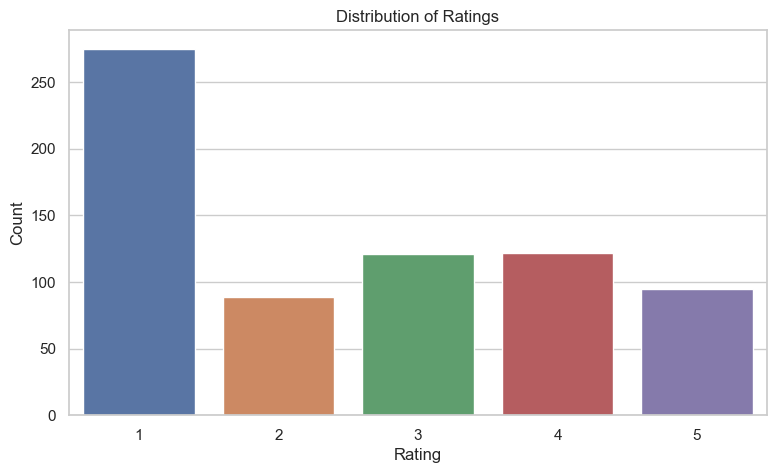

In [15]:
sns.set(style='whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [19]:
!pip install textblob

     ------------------------------------ 626.3/626.3 kB 331.4 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 349.2 kB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [20]:
from textblob import TextBlob

In [23]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [24]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [25]:
df.sample(5)

,Review,Rating,Sentiment
510,Great new UI (2.0)! Sync with contacts is also...,4,Positive
324,New version asks for access to contacts data? ...,3,Positive
204,Works very well on my Desire HD,4,Positive
440,"Slow, slow, slow. Refresh cycle never ending. ...",2,Negative
23,LI - are you reading these reviews??? Force cl...,1,Positive


In [26]:
# flexframe work, restfull api, google maps api excess and intregation , location gps access 

# Analyzing App Reviews Sentiments

In [30]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Positive    298
Neutral     297
Negative    107
Name: Sentiment, dtype: int64

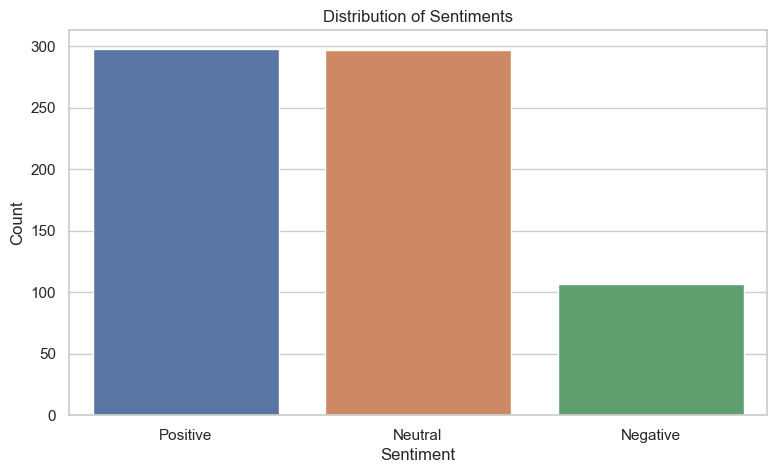

In [31]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
           y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [32]:
#talent platform

# So, we can see a althrough the app has low ratings, still the reviewers don't use many negative words in the reviews for the app

next, we'll explore relationship between the sentiments and the ratings. this analysis can help us understand whether there is a correlation between the sentiment of the text and nymerical ratings.

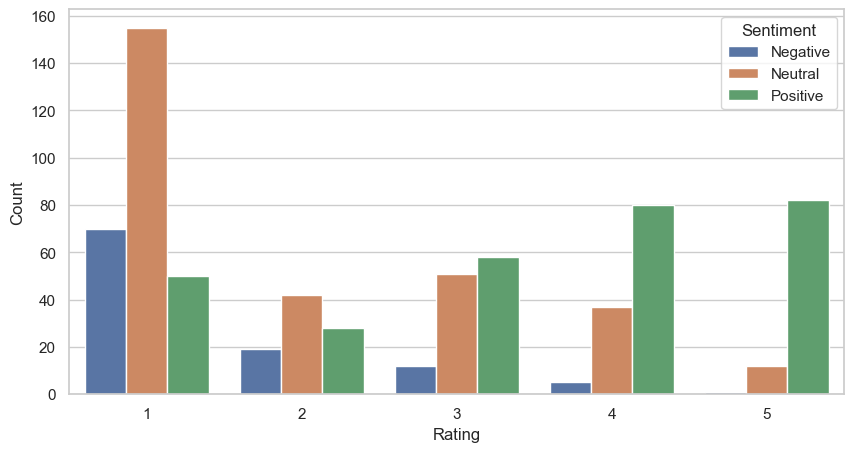

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
             x= 'Rating',
             hue= 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()